In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\lanmo\Downloads\train.xlsx")

In [3]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
df.head()

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1


In [5]:
df[df['Стоимость'] == max(df['Стоимость'])]

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
10011,20230801-6634-192772878,1,986400.0,39400,Отложенная электронная оплата: Банк Россия (ба...,2023-04-09 16:51:55,NaT,2023-08-01 15:00:00,26,2023-08-27 12:00:00,Официальный сайт,Активный,Коттедж с 3 спальнями,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Статус брони        26174 non-null  object        
 12  Категория номера    26174 non-null  object        
 13  Гостей              26174 non-null  int64     

In [7]:
df.isna().sum()/len(df) * 100

№ брони                0.000000
Номеров                0.000000
Стоимость              0.000000
Внесена предоплата     0.000000
Способ оплаты          0.000000
Дата бронирования      0.000000
Дата отмены           80.163521
Заезд                  0.000000
Ночей                  0.000000
Выезд                  0.000000
Источник               0.000000
Статус брони           0.000000
Категория номера       0.000000
Гостей                 0.000000
Гостиница              0.000000
dtype: float64

In [8]:
df = df.fillna(0)

In [9]:
def replace(x):
    if x != 0:
        return 1
    else:
        return 0

In [10]:
df['Дата отмены'] = df['Дата отмены'].apply(replace)

In [11]:
df

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,0,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,0,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,0,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,1,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3


In [12]:
df['month'] = df['Дата бронирования'].apply(lambda x : x.strftime('%m'))
df['weekday'] = df['Дата бронирования'].apply(lambda x : x.strftime('%a'))
df['delta_day'] = (df['Заезд'] - df['Дата бронирования']).dt.days
df['Year'] = df['Дата бронирования'].dt.year
df['Quartal'] = df['Дата бронирования'].dt.quarter

In [13]:
df1 = df.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [14]:
df1.head(10)

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Источник,Статус брони,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,04,Thu,7,2023,2
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,Официальный сайт,Активный,Номер «Стандарт»,2,1,06,Sat,23,2022,2
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,Официальный сайт,Активный,Номер «Студия»,2,4,11,Mon,19,2022,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,Bronevik.com(new),Активный,Номер «Стандарт»,1,3,09,Fri,9,2023,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,Официальный сайт,Активный,Номер «Люкс»,4,1,05,Sat,8,2023,2
5,20230904-7491-218448208,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),1,4,Официальный сайт,Отмена,Номер «Стандарт»,3,3,08,Tue,20,2023,3
6,20220218-7492-124990127,1,7650.0,0,Гарантия банковской картой,1,1,booking.com,Отмена,Номер «Стандарт»,1,2,02,Tue,2,2022,1
7,20230921-7491-221547353,1,26200.0,0,Внешняя система оплаты (Оплата наличными),0,2,Bronevik.com(new),Активный,Номер «Стандарт»,2,3,08,Tue,22,2023,3
8,20230625-7491-204432766,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,1,1,Официальный сайт,Отмена,Номер «Стандарт»,2,3,06,Mon,12,2023,2
9,20240122-6634-234004847,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),0,1,Официальный сайт,Активный,Номер «Стандарт»,2,1,11,Wed,85,2023,4


In [15]:
df_month = pd.DataFrame(df1.groupby(['month','Дата отмены'])
.size()
.reset_index())

In [16]:
import seaborn as sns

<Axes: xlabel='month', ylabel='0'>

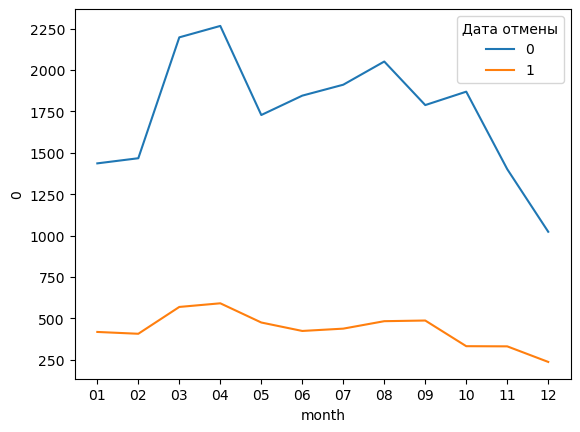

In [17]:
sns.lineplot(df_month, x ='month',y=0,hue = 'Дата отмены')

<Axes: xlabel='weekday', ylabel='0'>

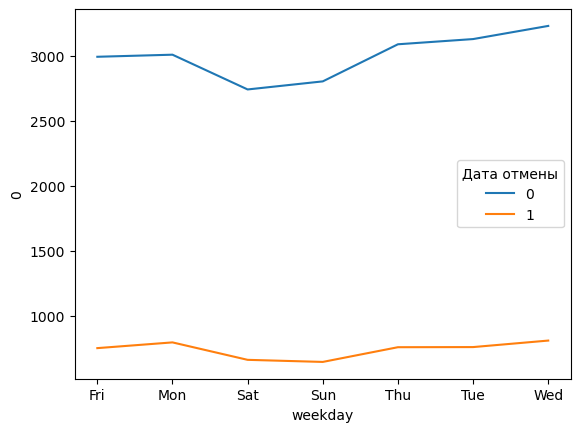

In [18]:
df_day = pd.DataFrame(df1.groupby(['weekday','Дата отмены'])
.size()
.reset_index())
sns.lineplot(df_day, x ='weekday',y=0,hue = 'Дата отмены')
#Тут приблизительно в одном разбросе 

In [19]:
inde = df1[df1['delta_day'] == -1].index
df1.loc[inde,'delta_day'] = 0

In [20]:
df1.drop(['weekday','Статус брони','№ брони'],axis = 1,inplace = True)

In [21]:
df1.head(5)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Источник,Категория номера,Гостей,Гостиница,month,delta_day,Year,Quartal
0,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2023,2
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,Официальный сайт,Номер «Стандарт»,2,1,06,23,2022,2
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,Официальный сайт,Номер «Студия»,2,4,11,19,2022,4
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,Bronevik.com(new),Номер «Стандарт»,1,3,09,9,2023,3
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,Официальный сайт,Номер «Люкс»,4,1,05,8,2023,2


In [22]:
df1.groupby(["Quartal",'Дата отмены']).size()

Quartal  Дата отмены
1        0              5100
         1              1394
2        0              5839
         1              1490
3        0              5750
         1              1408
4        0              4293
         1               900
dtype: int64

# Тут год ничего не даёт

In [23]:
df1.groupby(['Year','Дата отмены']).size()

Year  Дата отмены
2022  0              10509
      1               2692
2023  0              10473
      1               2500
dtype: int64

In [24]:
df1.rename(columns = {'Источник':'Source'}, inplace = True )

In [25]:
s = df1.Source.value_counts()

In [26]:
df1['source_count'] = df1['Source'].map(s)

In [27]:
df1.loc[df1['Source'] == "Официальный сайт", "Source"] = "official_website"
df1.loc[df1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df1.loc[df1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df1.loc[df1['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [28]:
df1.drop(['source_count','Year'],axis = 1,inplace =True)

In [29]:
df1.head(10)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal
0,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2
5,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),1,4,official_website,Номер «Стандарт»,3,3,08,20,3
6,1,7650.0,0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,1,2,02,2,1
7,1,26200.0,0,Внешняя система оплаты (Оплата наличными),0,2,small_online_service,Номер «Стандарт»,2,3,08,22,3
8,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,1,1,official_website,Номер «Стандарт»,2,3,06,12,2
9,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),0,1,official_website,Номер «Стандарт»,2,1,11,85,4


# Гостиницы

In [30]:
pd.DataFrame(df1.groupby(['Гостиница','Дата отмены']).size()).rename({0:'count'},axis =1)

count
Гостиница Дата отмены       
1         0             6798
          1             1685
2         0             5969
          1             1399
3         0             6424
          1             1582
4         0             1791
          1              526

In [31]:
df1.describe()

,Номеров,Стоимость,Внесена предоплата,Дата отмены,Ночей,Гостей,Гостиница,delta_day,Quartal
count,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000
mean,1.088714,35099.784232,19536.728165,0.198365,2.151295,2.601628,2.158822,28.101933,2.422175
std,0.341145,38849.552238,27776.602024,0.398776,1.456076,1.199428,0.979224,32.537671,1.066307
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,14300.000000,7800.000000,0.000000,1.000000,2.000000,1.000000,5.000000,2.000000
50%,1.000000,23800.000000,13900.000000,0.000000,2.000000,2.000000,2.000000,17.000000,2.000000
75%,1.000000,41100.000000,23180.000000,0.000000,3.000000,3.000000,3.000000,39.000000,3.000000
max,6.000000,986400.000000,584500.000000,1.000000,31.000000,16.000000,4.000000,284.000000,4.000000


In [32]:
df1['% внесена предоплата к стоимости'] = (df['Внесена предоплата']/df['Стоимость']).apply(lambda x:round(x,2))

In [33]:
df1.drop('Внесена предоплата',axis = 1,inplace = True)

In [34]:
df1.head()

,Номеров,Стоимость,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2,0.0
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2,0.5
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4,0.5
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3,0.0
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2,1.0


In [35]:
df1.groupby(['Гостей','Дата отмены']).size() #Гостей поменять на категориальную 

Гостей  Дата отмены
1       0               1256
        1                356
2       0              12282
        1               2833
3       0               3708
        1                972
4       0               2471
        1                683
5       0                652
        1                160
6       0                349
        1                 95
7       0                118
        1                 43
8       0                 92
        1                 26
9       0                 20
        1                  6
10      0                 25
        1                  9
11      0                  3
        1                  1
12      0                  2
        1                  4
13      0                  1
        1                  2
14      0                  2
        1                  1
15      1                  1
16      0                  1
dtype: int64

In [36]:
def obid(x):
    if x >= 8:
        return 'Много гостей'
    elif x<8 and x >= 5:
        return 'Среднее количество гостей'
    else:
        return 'Малое количество гостей'

In [37]:
df1['колво-гостей'] = df1['Гостей'].apply(obid)
df2 = df1.drop('Гостей',axis=1)

In [38]:
df2.head(10)

,Номеров,Стоимость,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости,колво-гостей
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,1,04,7,2,0.00,Малое количество гостей
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,1,06,23,2,0.50,Малое количество гостей
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,4,11,19,4,0.50,Малое количество гостей
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,3,09,9,3,0.00,Малое количество гостей
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,1,05,8,2,1.00,Малое количество гостей
5,1,39100.0,Банк. карта: Банк Россия (банк. карта),1,4,official_website,Номер «Стандарт»,3,08,20,3,0.22,Малое количество гостей
6,1,7650.0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,2,02,2,1,0.00,Малое количество гостей
7,1,26200.0,Внешняя система оплаты (Оплата наличными),0,2,small_online_service,Номер «Стандарт»,3,08,22,3,0.00,Малое количество гостей
8,1,14400.0,Отложенная электронная оплата: Банк Россия (ба...,1,1,official_website,Номер «Стандарт»,3,06,12,2,0.00,Малое количество гостей
9,1,11200.0,Банк. карта: Банк Россия (банк. карта),0,1,official_website,Номер «Стандарт»,1,11,85,4,0.60,Малое количество гостей


In [39]:
df2.rename(columns = {'Категория номера':'Room_category'}, inplace = True )

In [40]:
total_rooms = df2['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df2['Room_category'] = df2['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

In [41]:
df2.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [42]:
total_payment = df2['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df2['Payment'] = df2['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

In [43]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df2['Регионы'] = df2['Гостиница'].apply(reg)
df2.drop('Гостиница',axis =1,inplace=True)

In [44]:
df0 = pd.get_dummies(df2,columns = ['Source','month','Payment','Room_category','колво-гостей','Quartal'],drop_first=True,dtype = int)

In [45]:
df0

,Номеров,Стоимость,Дата отмены,Ночей,delta_day,% внесена предоплата к стоимости,Регионы,Source_official_website,Source_ostrovok.ru,Source_small_online_service,...,Room_category_Коттедж с 2 спальнями,Room_category_Коттедж с 3 спальнями,Room_category_Номер «Люкс»,Room_category_Номер «Стандарт»,Room_category_Номер «Студия»,колво-гостей_Много гостей,колво-гостей_Среднее количество гостей,Quartal_2,Quartal_3,Quartal_4
0,1,25700.0,1,3,7,0.00,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,24800.0,0,2,23,0.50,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,25800.0,0,2,19,0.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,10500.0,0,1,9,0.00,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,28690.0,0,2,8,1.00,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,0,2,61,0.50,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
26170,1,69600.0,0,3,4,0.33,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
26171,1,55600.0,0,4,46,0.25,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
26172,1,6300.0,1,1,67,0.00,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [47]:
rf.fit(df0.drop('Дата отмены',axis = 1),df0['Дата отмены'])

RandomForestClassifier()

In [48]:
feature = pd.DataFrame({'name':df0.drop('Дата отмены',axis = 1).columns,'featue':rf.feature_importances_}).sort_values('featue',ascending = False)

In [49]:
feature # Узнать как влияет

,name,featue
4,% внесена предоплата к стоимости,0.251894
3,delta_day,0.205694
1,Стоимость,0.172534
28,Payment_Отложенная электронная оплата: Банк Ро...,0.100881
2,Ночей,0.034689
24,Payment_Банк. карта: Банк Россия (банк. карта),0.023236
5,Регионы,0.015681
25,Payment_Внешняя система оплаты,0.012497
6,Source_official_website,0.012139
11,Source_Яндекс.Путешествия,0.011899


In [53]:
feat = list(feature.loc[feature['featue']>0.01,'name'])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = df0[feat]
y = df0['Дата отмены']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [58]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

cat_features  = ['Source','month','Payment','Room_category','колво-гостей','Quartal','Гостиница']
train_data = Pool(X_train, 
                  label=y_train, 
                  cat_features=cat_features)

test_data = Pool(X_test, 
                  label=y_test, 
                  cat_features=cat_features)

In [59]:
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

In [61]:
model = CatBoostClassifier(learning_rate=0.005,iterations = 3657,depth = 4,l2_leaf_reg= 3,eval_metric='AUC')

In [62]:
model.fit(X_train,y_train, eval_set = (X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8223380	best: 0.8223380 (0)	total: 170ms	remaining: 10m 22s
1:	test: 0.8506158	best: 0.8506158 (1)	total: 181ms	remaining: 5m 31s
2:	test: 0.8507265	best: 0.8507265 (2)	total: 191ms	remaining: 3m 53s
3:	test: 0.8541000	best: 0.8541000 (3)	total: 201ms	remaining: 3m 3s
4:	test: 0.8541845	best: 0.8541845 (4)	total: 211ms	remaining: 2m 33s
5:	test: 0.8566298	best: 0.8566298 (5)	total: 221ms	remaining: 2m 14s
6:	test: 0.8553808	best: 0.8566298 (5)	total: 231ms	remaining: 2m
7:	test: 0.8589575	best: 0.8589575 (7)	total: 241ms	remaining: 1m 49s
8:	test: 0.8602150	best: 0.8602150 (8)	total: 251ms	remaining: 1m 41s
9:	test: 0.8601497	best: 0.8602150 (8)	total: 260ms	remaining: 1m 34s
10:	test: 0.8600568	best: 0.8602150 (8)	total: 270ms	remaining: 1m 29s
11:	test: 0.8598208	best: 0.8602150 (8)	total: 279ms	remaining: 1m 24s
12:	test: 0.8599561	best: 0.8602150 (8)	total: 289ms	remaining: 1m 20s
13:	test: 0.8604043	best: 0.8604043 (13)	total: 298ms	remaining: 1m 17s
14:	test: 0.8607290

123:	test: 0.8614542	best: 0.8618001 (46)	total: 1.42s	remaining: 40.5s
124:	test: 0.8614737	best: 0.8618001 (46)	total: 1.43s	remaining: 40.4s
125:	test: 0.8614143	best: 0.8618001 (46)	total: 1.44s	remaining: 40.4s
126:	test: 0.8614104	best: 0.8618001 (46)	total: 1.45s	remaining: 40.3s
127:	test: 0.8615015	best: 0.8618001 (46)	total: 1.46s	remaining: 40.3s
128:	test: 0.8615421	best: 0.8618001 (46)	total: 1.47s	remaining: 40.2s
129:	test: 0.8615911	best: 0.8618001 (46)	total: 1.48s	remaining: 40.2s
130:	test: 0.8615861	best: 0.8618001 (46)	total: 1.49s	remaining: 40.2s
131:	test: 0.8616203	best: 0.8618001 (46)	total: 1.5s	remaining: 40.1s
132:	test: 0.8616208	best: 0.8618001 (46)	total: 1.51s	remaining: 40.1s
133:	test: 0.8616156	best: 0.8618001 (46)	total: 1.54s	remaining: 40.4s
134:	test: 0.8616127	best: 0.8618001 (46)	total: 1.55s	remaining: 40.4s
135:	test: 0.8616381	best: 0.8618001 (46)	total: 1.56s	remaining: 40.4s
136:	test: 0.8616491	best: 0.8618001 (46)	total: 1.57s	remaining:

247:	test: 0.8625436	best: 0.8625436 (246)	total: 2.67s	remaining: 36.7s
248:	test: 0.8625639	best: 0.8625639 (248)	total: 2.68s	remaining: 36.7s
249:	test: 0.8625790	best: 0.8625790 (249)	total: 2.69s	remaining: 36.7s
250:	test: 0.8626240	best: 0.8626240 (250)	total: 2.7s	remaining: 36.6s
251:	test: 0.8626535	best: 0.8626535 (251)	total: 2.71s	remaining: 36.6s
252:	test: 0.8626969	best: 0.8626969 (252)	total: 2.72s	remaining: 36.6s
253:	test: 0.8627036	best: 0.8627036 (253)	total: 2.73s	remaining: 36.6s
254:	test: 0.8627295	best: 0.8627295 (254)	total: 2.74s	remaining: 36.5s
255:	test: 0.8627411	best: 0.8627411 (255)	total: 2.75s	remaining: 36.5s
256:	test: 0.8627391	best: 0.8627411 (255)	total: 2.76s	remaining: 36.5s
257:	test: 0.8627486	best: 0.8627486 (257)	total: 2.77s	remaining: 36.5s
258:	test: 0.8627879	best: 0.8627879 (258)	total: 2.78s	remaining: 36.4s
259:	test: 0.8627993	best: 0.8627993 (259)	total: 2.79s	remaining: 36.4s
260:	test: 0.8628234	best: 0.8628234 (260)	total: 2.

376:	test: 0.8638973	best: 0.8638973 (376)	total: 3.9s	remaining: 33.9s
377:	test: 0.8639288	best: 0.8639288 (377)	total: 3.91s	remaining: 33.9s
378:	test: 0.8639478	best: 0.8639478 (378)	total: 3.92s	remaining: 33.9s
379:	test: 0.8639835	best: 0.8639835 (379)	total: 3.93s	remaining: 33.9s
380:	test: 0.8640128	best: 0.8640128 (380)	total: 3.94s	remaining: 33.9s
381:	test: 0.8640502	best: 0.8640502 (381)	total: 3.95s	remaining: 33.9s
382:	test: 0.8640411	best: 0.8640502 (381)	total: 3.97s	remaining: 34s
383:	test: 0.8640521	best: 0.8640521 (383)	total: 3.98s	remaining: 34s
384:	test: 0.8640564	best: 0.8640564 (384)	total: 3.99s	remaining: 33.9s
385:	test: 0.8640819	best: 0.8640819 (385)	total: 4s	remaining: 33.9s
386:	test: 0.8640843	best: 0.8640843 (386)	total: 4.01s	remaining: 33.9s
387:	test: 0.8641206	best: 0.8641206 (387)	total: 4.02s	remaining: 33.9s
388:	test: 0.8641557	best: 0.8641557 (388)	total: 4.03s	remaining: 33.9s
389:	test: 0.8641750	best: 0.8641750 (389)	total: 4.04s	rem

501:	test: 0.8654834	best: 0.8654834 (501)	total: 5.12s	remaining: 32.2s
502:	test: 0.8654822	best: 0.8654834 (501)	total: 5.13s	remaining: 32.2s
503:	test: 0.8654895	best: 0.8654895 (503)	total: 5.14s	remaining: 32.2s
504:	test: 0.8655029	best: 0.8655029 (504)	total: 5.16s	remaining: 32.2s
505:	test: 0.8655170	best: 0.8655170 (505)	total: 5.17s	remaining: 32.2s
506:	test: 0.8655265	best: 0.8655265 (506)	total: 5.17s	remaining: 32.1s
507:	test: 0.8655482	best: 0.8655482 (507)	total: 5.18s	remaining: 32.1s
508:	test: 0.8655479	best: 0.8655482 (507)	total: 5.19s	remaining: 32.1s
509:	test: 0.8655620	best: 0.8655620 (509)	total: 5.2s	remaining: 32.1s
510:	test: 0.8655654	best: 0.8655654 (510)	total: 5.21s	remaining: 32.1s
511:	test: 0.8655807	best: 0.8655807 (511)	total: 5.22s	remaining: 32.1s
512:	test: 0.8655795	best: 0.8655807 (511)	total: 5.23s	remaining: 32.1s
513:	test: 0.8655975	best: 0.8655975 (513)	total: 5.24s	remaining: 32.1s
514:	test: 0.8655908	best: 0.8655975 (513)	total: 5.

628:	test: 0.8666265	best: 0.8666265 (628)	total: 6.35s	remaining: 30.6s
629:	test: 0.8666380	best: 0.8666380 (629)	total: 6.36s	remaining: 30.6s
630:	test: 0.8666453	best: 0.8666453 (630)	total: 6.37s	remaining: 30.6s
631:	test: 0.8666591	best: 0.8666591 (631)	total: 6.38s	remaining: 30.5s
632:	test: 0.8666581	best: 0.8666591 (631)	total: 6.39s	remaining: 30.5s
633:	test: 0.8666838	best: 0.8666838 (633)	total: 6.4s	remaining: 30.5s
634:	test: 0.8666767	best: 0.8666838 (633)	total: 6.41s	remaining: 30.5s
635:	test: 0.8666841	best: 0.8666841 (635)	total: 6.42s	remaining: 30.5s
636:	test: 0.8667011	best: 0.8667011 (636)	total: 6.43s	remaining: 30.5s
637:	test: 0.8667067	best: 0.8667067 (637)	total: 6.44s	remaining: 30.5s
638:	test: 0.8666997	best: 0.8667067 (637)	total: 6.45s	remaining: 30.5s
639:	test: 0.8667210	best: 0.8667210 (639)	total: 6.46s	remaining: 30.5s
640:	test: 0.8667479	best: 0.8667479 (640)	total: 6.47s	remaining: 30.4s
641:	test: 0.8667520	best: 0.8667520 (641)	total: 6.

759:	test: 0.8674734	best: 0.8674745 (758)	total: 7.62s	remaining: 29s
760:	test: 0.8674691	best: 0.8674745 (758)	total: 7.63s	remaining: 29s
761:	test: 0.8674751	best: 0.8674751 (761)	total: 7.64s	remaining: 29s
762:	test: 0.8675174	best: 0.8675174 (762)	total: 7.65s	remaining: 29s
763:	test: 0.8675134	best: 0.8675174 (762)	total: 7.66s	remaining: 29s
764:	test: 0.8675110	best: 0.8675174 (762)	total: 7.67s	remaining: 29s
765:	test: 0.8675256	best: 0.8675256 (765)	total: 7.68s	remaining: 29s
766:	test: 0.8675159	best: 0.8675256 (765)	total: 7.69s	remaining: 29s
767:	test: 0.8675149	best: 0.8675256 (765)	total: 7.7s	remaining: 28.9s
768:	test: 0.8675437	best: 0.8675437 (768)	total: 7.7s	remaining: 28.9s
769:	test: 0.8675652	best: 0.8675652 (769)	total: 7.71s	remaining: 28.9s
770:	test: 0.8675786	best: 0.8675786 (770)	total: 7.72s	remaining: 28.9s
771:	test: 0.8675734	best: 0.8675786 (770)	total: 7.73s	remaining: 28.9s
772:	test: 0.8675782	best: 0.8675786 (770)	total: 7.74s	remaining: 28

885:	test: 0.8681097	best: 0.8681097 (885)	total: 8.85s	remaining: 27.7s
886:	test: 0.8681095	best: 0.8681097 (885)	total: 8.86s	remaining: 27.7s
887:	test: 0.8681109	best: 0.8681109 (887)	total: 8.87s	remaining: 27.7s
888:	test: 0.8681195	best: 0.8681195 (888)	total: 8.88s	remaining: 27.7s
889:	test: 0.8681262	best: 0.8681262 (889)	total: 8.89s	remaining: 27.6s
890:	test: 0.8681272	best: 0.8681272 (890)	total: 8.9s	remaining: 27.6s
891:	test: 0.8681199	best: 0.8681272 (890)	total: 8.91s	remaining: 27.6s
892:	test: 0.8681198	best: 0.8681272 (890)	total: 8.92s	remaining: 27.6s
893:	test: 0.8681225	best: 0.8681272 (890)	total: 8.93s	remaining: 27.6s
894:	test: 0.8681406	best: 0.8681406 (894)	total: 8.94s	remaining: 27.6s
895:	test: 0.8681514	best: 0.8681514 (895)	total: 8.95s	remaining: 27.6s
896:	test: 0.8681535	best: 0.8681535 (896)	total: 8.96s	remaining: 27.6s
897:	test: 0.8681614	best: 0.8681614 (897)	total: 8.97s	remaining: 27.6s
898:	test: 0.8681605	best: 0.8681614 (897)	total: 8.

1006:	test: 0.8684482	best: 0.8684482 (1006)	total: 10.1s	remaining: 26.6s
1007:	test: 0.8684532	best: 0.8684532 (1007)	total: 10.1s	remaining: 26.6s
1008:	test: 0.8684557	best: 0.8684557 (1008)	total: 10.1s	remaining: 26.6s
1009:	test: 0.8684566	best: 0.8684566 (1009)	total: 10.2s	remaining: 26.6s
1010:	test: 0.8684560	best: 0.8684566 (1009)	total: 10.2s	remaining: 26.6s
1011:	test: 0.8684577	best: 0.8684577 (1011)	total: 10.2s	remaining: 26.6s
1012:	test: 0.8684575	best: 0.8684577 (1011)	total: 10.2s	remaining: 26.6s
1013:	test: 0.8684556	best: 0.8684577 (1011)	total: 10.2s	remaining: 26.6s
1014:	test: 0.8684583	best: 0.8684583 (1014)	total: 10.2s	remaining: 26.6s
1015:	test: 0.8684614	best: 0.8684614 (1015)	total: 10.2s	remaining: 26.5s
1016:	test: 0.8684630	best: 0.8684630 (1016)	total: 10.2s	remaining: 26.5s
1017:	test: 0.8684620	best: 0.8684630 (1016)	total: 10.2s	remaining: 26.5s
1018:	test: 0.8684636	best: 0.8684636 (1018)	total: 10.2s	remaining: 26.5s
1019:	test: 0.8684635	bes

1128:	test: 0.8685920	best: 0.8686018 (1126)	total: 11.6s	remaining: 25.9s
1129:	test: 0.8685936	best: 0.8686018 (1126)	total: 11.6s	remaining: 25.9s
1130:	test: 0.8685969	best: 0.8686018 (1126)	total: 11.6s	remaining: 25.9s
1131:	test: 0.8685966	best: 0.8686018 (1126)	total: 11.6s	remaining: 25.9s
1132:	test: 0.8685920	best: 0.8686018 (1126)	total: 11.6s	remaining: 25.9s
1133:	test: 0.8685919	best: 0.8686018 (1126)	total: 11.6s	remaining: 25.9s
1134:	test: 0.8685959	best: 0.8686018 (1126)	total: 11.6s	remaining: 25.9s
1135:	test: 0.8686018	best: 0.8686018 (1126)	total: 11.7s	remaining: 25.9s
1136:	test: 0.8685991	best: 0.8686018 (1126)	total: 11.7s	remaining: 25.9s
1137:	test: 0.8686000	best: 0.8686018 (1126)	total: 11.7s	remaining: 25.8s
1138:	test: 0.8686011	best: 0.8686018 (1126)	total: 11.7s	remaining: 25.8s
1139:	test: 0.8686011	best: 0.8686018 (1126)	total: 11.7s	remaining: 25.8s
1140:	test: 0.8685968	best: 0.8686018 (1126)	total: 11.7s	remaining: 25.8s
1141:	test: 0.8686067	bes

1250:	test: 0.8687748	best: 0.8687817 (1240)	total: 12.8s	remaining: 24.6s
1251:	test: 0.8687756	best: 0.8687817 (1240)	total: 12.8s	remaining: 24.6s
1252:	test: 0.8687710	best: 0.8687817 (1240)	total: 12.8s	remaining: 24.6s
1253:	test: 0.8687693	best: 0.8687817 (1240)	total: 12.8s	remaining: 24.6s
1254:	test: 0.8687680	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.6s
1255:	test: 0.8687662	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.6s
1256:	test: 0.8687698	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.6s
1257:	test: 0.8687698	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.6s
1258:	test: 0.8687665	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.6s
1259:	test: 0.8687685	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.6s
1260:	test: 0.8687741	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.5s
1261:	test: 0.8687732	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.5s
1262:	test: 0.8687705	best: 0.8687817 (1240)	total: 12.9s	remaining: 24.5s
1263:	test: 0.8687763	bes

1377:	test: 0.8688352	best: 0.8688439 (1369)	total: 14.1s	remaining: 23.3s
1378:	test: 0.8688378	best: 0.8688439 (1369)	total: 14.1s	remaining: 23.3s
1379:	test: 0.8688383	best: 0.8688439 (1369)	total: 14.1s	remaining: 23.3s
1380:	test: 0.8688353	best: 0.8688439 (1369)	total: 14.1s	remaining: 23.3s
1381:	test: 0.8688417	best: 0.8688439 (1369)	total: 14.1s	remaining: 23.2s
1382:	test: 0.8688478	best: 0.8688478 (1382)	total: 14.1s	remaining: 23.2s
1383:	test: 0.8688505	best: 0.8688505 (1383)	total: 14.1s	remaining: 23.2s
1384:	test: 0.8688496	best: 0.8688505 (1383)	total: 14.1s	remaining: 23.2s
1385:	test: 0.8688524	best: 0.8688524 (1385)	total: 14.2s	remaining: 23.2s
1386:	test: 0.8688579	best: 0.8688579 (1386)	total: 14.2s	remaining: 23.2s
1387:	test: 0.8688563	best: 0.8688579 (1386)	total: 14.2s	remaining: 23.2s
1388:	test: 0.8688606	best: 0.8688606 (1388)	total: 14.2s	remaining: 23.2s
1389:	test: 0.8688564	best: 0.8688606 (1388)	total: 14.2s	remaining: 23.1s
1390:	test: 0.8688552	bes

1505:	test: 0.8689625	best: 0.8689701 (1482)	total: 15.3s	remaining: 21.9s
1506:	test: 0.8689618	best: 0.8689701 (1482)	total: 15.3s	remaining: 21.9s
1507:	test: 0.8689668	best: 0.8689701 (1482)	total: 15.3s	remaining: 21.8s
1508:	test: 0.8689677	best: 0.8689701 (1482)	total: 15.3s	remaining: 21.8s
1509:	test: 0.8689664	best: 0.8689701 (1482)	total: 15.3s	remaining: 21.8s
1510:	test: 0.8689592	best: 0.8689701 (1482)	total: 15.4s	remaining: 21.8s
1511:	test: 0.8689628	best: 0.8689701 (1482)	total: 15.4s	remaining: 21.8s
1512:	test: 0.8689650	best: 0.8689701 (1482)	total: 15.4s	remaining: 21.8s
1513:	test: 0.8689652	best: 0.8689701 (1482)	total: 15.4s	remaining: 21.8s
1514:	test: 0.8689710	best: 0.8689710 (1514)	total: 15.4s	remaining: 21.8s
1515:	test: 0.8689711	best: 0.8689711 (1515)	total: 15.4s	remaining: 21.8s
1516:	test: 0.8689683	best: 0.8689711 (1515)	total: 15.4s	remaining: 21.7s
1517:	test: 0.8689693	best: 0.8689711 (1515)	total: 15.4s	remaining: 21.7s
1518:	test: 0.8689716	bes

1628:	test: 0.8691010	best: 0.8691010 (1628)	total: 16.5s	remaining: 20.6s
1629:	test: 0.8691013	best: 0.8691013 (1629)	total: 16.5s	remaining: 20.6s
1630:	test: 0.8691050	best: 0.8691050 (1630)	total: 16.5s	remaining: 20.6s
1631:	test: 0.8691056	best: 0.8691056 (1631)	total: 16.6s	remaining: 20.5s
1632:	test: 0.8691041	best: 0.8691056 (1631)	total: 16.6s	remaining: 20.5s
1633:	test: 0.8691040	best: 0.8691056 (1631)	total: 16.6s	remaining: 20.5s
1634:	test: 0.8691065	best: 0.8691065 (1634)	total: 16.6s	remaining: 20.5s
1635:	test: 0.8691052	best: 0.8691065 (1634)	total: 16.6s	remaining: 20.5s
1636:	test: 0.8691059	best: 0.8691065 (1634)	total: 16.6s	remaining: 20.5s
1637:	test: 0.8691095	best: 0.8691095 (1637)	total: 16.6s	remaining: 20.5s
1638:	test: 0.8691142	best: 0.8691142 (1638)	total: 16.6s	remaining: 20.5s
1639:	test: 0.8691159	best: 0.8691159 (1639)	total: 16.6s	remaining: 20.4s
1640:	test: 0.8691200	best: 0.8691200 (1640)	total: 16.6s	remaining: 20.4s
1641:	test: 0.8691216	bes

1758:	test: 0.8691368	best: 0.8691459 (1666)	total: 17.8s	remaining: 19.2s
1759:	test: 0.8691377	best: 0.8691459 (1666)	total: 17.8s	remaining: 19.2s
1760:	test: 0.8691373	best: 0.8691459 (1666)	total: 17.8s	remaining: 19.2s
1761:	test: 0.8691396	best: 0.8691459 (1666)	total: 17.8s	remaining: 19.2s
1762:	test: 0.8691386	best: 0.8691459 (1666)	total: 17.8s	remaining: 19.2s
1763:	test: 0.8691380	best: 0.8691459 (1666)	total: 17.9s	remaining: 19.2s
1764:	test: 0.8691398	best: 0.8691459 (1666)	total: 17.9s	remaining: 19.2s
1765:	test: 0.8691408	best: 0.8691459 (1666)	total: 17.9s	remaining: 19.1s
1766:	test: 0.8691411	best: 0.8691459 (1666)	total: 17.9s	remaining: 19.1s
1767:	test: 0.8691401	best: 0.8691459 (1666)	total: 17.9s	remaining: 19.1s
1768:	test: 0.8691444	best: 0.8691459 (1666)	total: 17.9s	remaining: 19.1s
1769:	test: 0.8691390	best: 0.8691459 (1666)	total: 17.9s	remaining: 19.1s
1770:	test: 0.8691361	best: 0.8691459 (1666)	total: 17.9s	remaining: 19.1s
1771:	test: 0.8691349	bes

1875:	test: 0.8692014	best: 0.8692141 (1861)	total: 19.1s	remaining: 18.1s
1876:	test: 0.8692022	best: 0.8692141 (1861)	total: 19.1s	remaining: 18.1s
1877:	test: 0.8692062	best: 0.8692141 (1861)	total: 19.1s	remaining: 18.1s
1878:	test: 0.8692034	best: 0.8692141 (1861)	total: 19.1s	remaining: 18.1s
1879:	test: 0.8692037	best: 0.8692141 (1861)	total: 19.1s	remaining: 18.1s
1880:	test: 0.8692055	best: 0.8692141 (1861)	total: 19.1s	remaining: 18s
1881:	test: 0.8692041	best: 0.8692141 (1861)	total: 19.1s	remaining: 18s
1882:	test: 0.8692025	best: 0.8692141 (1861)	total: 19.1s	remaining: 18s
1883:	test: 0.8691967	best: 0.8692141 (1861)	total: 19.1s	remaining: 18s
1884:	test: 0.8691974	best: 0.8692141 (1861)	total: 19.1s	remaining: 18s
1885:	test: 0.8692004	best: 0.8692141 (1861)	total: 19.2s	remaining: 18s
1886:	test: 0.8691998	best: 0.8692141 (1861)	total: 19.2s	remaining: 18s
1887:	test: 0.8692058	best: 0.8692141 (1861)	total: 19.2s	remaining: 18s
1888:	test: 0.8692017	best: 0.8692141 (18

1997:	test: 0.8692800	best: 0.8692800 (1997)	total: 20.4s	remaining: 16.9s
1998:	test: 0.8692787	best: 0.8692800 (1997)	total: 20.4s	remaining: 16.9s
1999:	test: 0.8692786	best: 0.8692800 (1997)	total: 20.4s	remaining: 16.9s
2000:	test: 0.8692731	best: 0.8692800 (1997)	total: 20.4s	remaining: 16.9s
2001:	test: 0.8692731	best: 0.8692800 (1997)	total: 20.4s	remaining: 16.9s
2002:	test: 0.8692861	best: 0.8692861 (2002)	total: 20.4s	remaining: 16.9s
2003:	test: 0.8692875	best: 0.8692875 (2003)	total: 20.4s	remaining: 16.9s
2004:	test: 0.8692885	best: 0.8692885 (2004)	total: 20.4s	remaining: 16.8s
2005:	test: 0.8692910	best: 0.8692910 (2005)	total: 20.4s	remaining: 16.8s
2006:	test: 0.8692924	best: 0.8692924 (2006)	total: 20.5s	remaining: 16.8s
2007:	test: 0.8692931	best: 0.8692931 (2007)	total: 20.5s	remaining: 16.8s
2008:	test: 0.8692953	best: 0.8692953 (2008)	total: 20.5s	remaining: 16.8s
2009:	test: 0.8692945	best: 0.8692953 (2008)	total: 20.5s	remaining: 16.8s
2010:	test: 0.8692924	bes

2114:	test: 0.8693762	best: 0.8693762 (2114)	total: 21.6s	remaining: 15.8s
2115:	test: 0.8693689	best: 0.8693762 (2114)	total: 21.6s	remaining: 15.7s
2116:	test: 0.8693734	best: 0.8693762 (2114)	total: 21.6s	remaining: 15.7s
2117:	test: 0.8693747	best: 0.8693762 (2114)	total: 21.6s	remaining: 15.7s
2118:	test: 0.8693737	best: 0.8693762 (2114)	total: 21.6s	remaining: 15.7s
2119:	test: 0.8693802	best: 0.8693802 (2119)	total: 21.7s	remaining: 15.7s
2120:	test: 0.8693808	best: 0.8693808 (2120)	total: 21.7s	remaining: 15.7s
2121:	test: 0.8693809	best: 0.8693809 (2121)	total: 21.7s	remaining: 15.7s
2122:	test: 0.8693817	best: 0.8693817 (2122)	total: 21.7s	remaining: 15.7s
2123:	test: 0.8693823	best: 0.8693823 (2123)	total: 21.7s	remaining: 15.7s
2124:	test: 0.8693811	best: 0.8693823 (2123)	total: 21.7s	remaining: 15.6s
2125:	test: 0.8693821	best: 0.8693823 (2123)	total: 21.7s	remaining: 15.6s
2126:	test: 0.8693826	best: 0.8693826 (2126)	total: 21.7s	remaining: 15.6s
2127:	test: 0.8693851	bes

2239:	test: 0.8693986	best: 0.8694271 (2194)	total: 22.8s	remaining: 14.4s
2240:	test: 0.8694004	best: 0.8694271 (2194)	total: 22.9s	remaining: 14.4s
2241:	test: 0.8694072	best: 0.8694271 (2194)	total: 22.9s	remaining: 14.4s
2242:	test: 0.8694022	best: 0.8694271 (2194)	total: 22.9s	remaining: 14.4s
2243:	test: 0.8694034	best: 0.8694271 (2194)	total: 22.9s	remaining: 14.4s
2244:	test: 0.8694038	best: 0.8694271 (2194)	total: 22.9s	remaining: 14.4s
2245:	test: 0.8694089	best: 0.8694271 (2194)	total: 22.9s	remaining: 14.4s
2246:	test: 0.8694077	best: 0.8694271 (2194)	total: 22.9s	remaining: 14.4s
2247:	test: 0.8694031	best: 0.8694271 (2194)	total: 22.9s	remaining: 14.4s
2248:	test: 0.8694013	best: 0.8694271 (2194)	total: 23s	remaining: 14.4s
2249:	test: 0.8693977	best: 0.8694271 (2194)	total: 23s	remaining: 14.4s
2250:	test: 0.8693974	best: 0.8694271 (2194)	total: 23s	remaining: 14.3s
2251:	test: 0.8693958	best: 0.8694271 (2194)	total: 23s	remaining: 14.3s
2252:	test: 0.8693958	best: 0.869

2356:	test: 0.8693870	best: 0.8694271 (2194)	total: 24.1s	remaining: 13.3s
2357:	test: 0.8693864	best: 0.8694271 (2194)	total: 24.1s	remaining: 13.3s
2358:	test: 0.8693796	best: 0.8694271 (2194)	total: 24.1s	remaining: 13.3s
2359:	test: 0.8693792	best: 0.8694271 (2194)	total: 24.1s	remaining: 13.3s
2360:	test: 0.8693783	best: 0.8694271 (2194)	total: 24.1s	remaining: 13.2s
2361:	test: 0.8693769	best: 0.8694271 (2194)	total: 24.1s	remaining: 13.2s
2362:	test: 0.8693829	best: 0.8694271 (2194)	total: 24.1s	remaining: 13.2s
2363:	test: 0.8693811	best: 0.8694271 (2194)	total: 24.2s	remaining: 13.2s
2364:	test: 0.8693797	best: 0.8694271 (2194)	total: 24.2s	remaining: 13.2s
2365:	test: 0.8693787	best: 0.8694271 (2194)	total: 24.2s	remaining: 13.2s
2366:	test: 0.8693797	best: 0.8694271 (2194)	total: 24.2s	remaining: 13.2s
2367:	test: 0.8693786	best: 0.8694271 (2194)	total: 24.2s	remaining: 13.2s
2368:	test: 0.8693748	best: 0.8694271 (2194)	total: 24.2s	remaining: 13.2s
2369:	test: 0.8693741	bes

2481:	test: 0.8693872	best: 0.8694271 (2194)	total: 25.3s	remaining: 12s
2482:	test: 0.8693835	best: 0.8694271 (2194)	total: 25.4s	remaining: 12s
2483:	test: 0.8693833	best: 0.8694271 (2194)	total: 25.4s	remaining: 12s
2484:	test: 0.8693793	best: 0.8694271 (2194)	total: 25.4s	remaining: 12s
2485:	test: 0.8693823	best: 0.8694271 (2194)	total: 25.4s	remaining: 12s
2486:	test: 0.8693841	best: 0.8694271 (2194)	total: 25.4s	remaining: 11.9s
2487:	test: 0.8693841	best: 0.8694271 (2194)	total: 25.4s	remaining: 11.9s
2488:	test: 0.8693841	best: 0.8694271 (2194)	total: 25.4s	remaining: 11.9s
2489:	test: 0.8693841	best: 0.8694271 (2194)	total: 25.4s	remaining: 11.9s
2490:	test: 0.8693830	best: 0.8694271 (2194)	total: 25.4s	remaining: 11.9s
2491:	test: 0.8693787	best: 0.8694271 (2194)	total: 25.4s	remaining: 11.9s
2492:	test: 0.8693769	best: 0.8694271 (2194)	total: 25.5s	remaining: 11.9s
2493:	test: 0.8693769	best: 0.8694271 (2194)	total: 25.5s	remaining: 11.9s
2494:	test: 0.8693743	best: 0.86942

2607:	test: 0.8694166	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.7s
2608:	test: 0.8694142	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.7s
2609:	test: 0.8694138	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.7s
2610:	test: 0.8694138	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.7s
2611:	test: 0.8694135	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.7s
2612:	test: 0.8694110	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.7s
2613:	test: 0.8694068	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.7s
2614:	test: 0.8694047	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.6s
2615:	test: 0.8694019	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.6s
2616:	test: 0.8694023	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.6s
2617:	test: 0.8694023	best: 0.8694271 (2194)	total: 26.7s	remaining: 10.6s
2618:	test: 0.8694052	best: 0.8694271 (2194)	total: 26.8s	remaining: 10.6s
2619:	test: 0.8694049	best: 0.8694271 (2194)	total: 26.8s	remaining: 10.6s
2620:	test: 0.8694043	bes

2733:	test: 0.8693615	best: 0.8694271 (2194)	total: 28s	remaining: 9.44s
2734:	test: 0.8693579	best: 0.8694271 (2194)	total: 28s	remaining: 9.43s
2735:	test: 0.8693579	best: 0.8694271 (2194)	total: 28s	remaining: 9.42s
2736:	test: 0.8693554	best: 0.8694271 (2194)	total: 28s	remaining: 9.41s
2737:	test: 0.8693499	best: 0.8694271 (2194)	total: 28s	remaining: 9.4s
2738:	test: 0.8693564	best: 0.8694271 (2194)	total: 28s	remaining: 9.39s
2739:	test: 0.8693564	best: 0.8694271 (2194)	total: 28s	remaining: 9.38s
2740:	test: 0.8693529	best: 0.8694271 (2194)	total: 28s	remaining: 9.37s
2741:	test: 0.8693537	best: 0.8694271 (2194)	total: 28s	remaining: 9.36s
2742:	test: 0.8693542	best: 0.8694271 (2194)	total: 28s	remaining: 9.34s
2743:	test: 0.8693558	best: 0.8694271 (2194)	total: 28.1s	remaining: 9.33s
2744:	test: 0.8693569	best: 0.8694271 (2194)	total: 28.1s	remaining: 9.32s
2745:	test: 0.8693546	best: 0.8694271 (2194)	total: 28.1s	remaining: 9.31s
2746:	test: 0.8693491	best: 0.8694271 (2194)	t

2850:	test: 0.8692723	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.27s
2851:	test: 0.8692748	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.26s
2852:	test: 0.8692726	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.25s
2853:	test: 0.8692748	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.24s
2854:	test: 0.8692772	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.23s
2855:	test: 0.8692775	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.22s
2856:	test: 0.8692771	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.21s
2857:	test: 0.8692771	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.2s
2858:	test: 0.8692766	best: 0.8694271 (2194)	total: 29.3s	remaining: 8.19s
2859:	test: 0.8692790	best: 0.8694271 (2194)	total: 29.4s	remaining: 8.18s
2860:	test: 0.8692823	best: 0.8694271 (2194)	total: 29.4s	remaining: 8.17s
2861:	test: 0.8692811	best: 0.8694271 (2194)	total: 29.4s	remaining: 8.16s
2862:	test: 0.8692795	best: 0.8694271 (2194)	total: 29.4s	remaining: 8.15s
2863:	test: 0.8692824	best

2973:	test: 0.8692365	best: 0.8694271 (2194)	total: 30.6s	remaining: 7.02s
2974:	test: 0.8692331	best: 0.8694271 (2194)	total: 30.6s	remaining: 7.01s
2975:	test: 0.8692334	best: 0.8694271 (2194)	total: 30.6s	remaining: 7s
2976:	test: 0.8692341	best: 0.8694271 (2194)	total: 30.6s	remaining: 6.99s
2977:	test: 0.8692459	best: 0.8694271 (2194)	total: 30.6s	remaining: 6.97s
2978:	test: 0.8692505	best: 0.8694271 (2194)	total: 30.6s	remaining: 6.96s
2979:	test: 0.8692497	best: 0.8694271 (2194)	total: 30.6s	remaining: 6.95s
2980:	test: 0.8692524	best: 0.8694271 (2194)	total: 30.6s	remaining: 6.94s
2981:	test: 0.8692521	best: 0.8694271 (2194)	total: 30.6s	remaining: 6.93s
2982:	test: 0.8692496	best: 0.8694271 (2194)	total: 30.6s	remaining: 6.92s
2983:	test: 0.8692487	best: 0.8694271 (2194)	total: 30.6s	remaining: 6.91s
2984:	test: 0.8692472	best: 0.8694271 (2194)	total: 30.7s	remaining: 6.9s
2985:	test: 0.8692466	best: 0.8694271 (2194)	total: 30.7s	remaining: 6.89s
2986:	test: 0.8692469	best: 0

3098:	test: 0.8692502	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.74s
3099:	test: 0.8692475	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.72s
3100:	test: 0.8692426	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.71s
3101:	test: 0.8692396	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.7s
3102:	test: 0.8692387	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.69s
3103:	test: 0.8692393	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.68s
3104:	test: 0.8692398	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.67s
3105:	test: 0.8692411	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.66s
3106:	test: 0.8692422	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.65s
3107:	test: 0.8692380	best: 0.8694271 (2194)	total: 31.9s	remaining: 5.64s
3108:	test: 0.8692374	best: 0.8694271 (2194)	total: 32s	remaining: 5.63s
3109:	test: 0.8692444	best: 0.8694271 (2194)	total: 32s	remaining: 5.62s
3110:	test: 0.8692530	best: 0.8694271 (2194)	total: 32s	remaining: 5.61s
3111:	test: 0.8692521	best: 0.86

3223:	test: 0.8692340	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.45s
3224:	test: 0.8692313	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.44s
3225:	test: 0.8692332	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.43s
3226:	test: 0.8692338	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.42s
3227:	test: 0.8692318	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.41s
3228:	test: 0.8692329	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.4s
3229:	test: 0.8692310	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.39s
3230:	test: 0.8692240	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.38s
3231:	test: 0.8692301	best: 0.8694271 (2194)	total: 33.2s	remaining: 4.37s
3232:	test: 0.8692234	best: 0.8694271 (2194)	total: 33.3s	remaining: 4.36s
3233:	test: 0.8692300	best: 0.8694271 (2194)	total: 33.3s	remaining: 4.35s
3234:	test: 0.8692277	best: 0.8694271 (2194)	total: 33.3s	remaining: 4.34s
3235:	test: 0.8692325	best: 0.8694271 (2194)	total: 33.3s	remaining: 4.33s
3236:	test: 0.8692312	best

3350:	test: 0.8692310	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.15s
3351:	test: 0.8692323	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.14s
3352:	test: 0.8692279	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.13s
3353:	test: 0.8692248	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.12s
3354:	test: 0.8692303	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.11s
3355:	test: 0.8692297	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.1s
3356:	test: 0.8692301	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.08s
3357:	test: 0.8692298	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.08s
3358:	test: 0.8692338	best: 0.8694271 (2194)	total: 34.5s	remaining: 3.06s
3359:	test: 0.8692352	best: 0.8694271 (2194)	total: 34.6s	remaining: 3.05s
3360:	test: 0.8692263	best: 0.8694271 (2194)	total: 34.6s	remaining: 3.04s
3361:	test: 0.8692200	best: 0.8694271 (2194)	total: 34.6s	remaining: 3.03s
3362:	test: 0.8692239	best: 0.8694271 (2194)	total: 34.6s	remaining: 3.02s
3363:	test: 0.8692233	best

3469:	test: 0.8692193	best: 0.8694271 (2194)	total: 35.8s	remaining: 1.93s
3470:	test: 0.8692179	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.92s
3471:	test: 0.8692181	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.91s
3472:	test: 0.8692179	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.9s
3473:	test: 0.8692197	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.89s
3474:	test: 0.8692175	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.88s
3475:	test: 0.8692144	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.87s
3476:	test: 0.8692181	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.86s
3477:	test: 0.8692176	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.85s
3478:	test: 0.8692190	best: 0.8694271 (2194)	total: 35.9s	remaining: 1.84s
3479:	test: 0.8692148	best: 0.8694271 (2194)	total: 36s	remaining: 1.83s
3480:	test: 0.8692093	best: 0.8694271 (2194)	total: 36s	remaining: 1.82s
3481:	test: 0.8692093	best: 0.8694271 (2194)	total: 36s	remaining: 1.81s
3482:	test: 0.8692053	best: 0.86

3585:	test: 0.8691545	best: 0.8694271 (2194)	total: 37.1s	remaining: 735ms
3586:	test: 0.8691572	best: 0.8694271 (2194)	total: 37.1s	remaining: 725ms
3587:	test: 0.8691584	best: 0.8694271 (2194)	total: 37.2s	remaining: 715ms
3588:	test: 0.8691567	best: 0.8694271 (2194)	total: 37.2s	remaining: 704ms
3589:	test: 0.8691589	best: 0.8694271 (2194)	total: 37.2s	remaining: 694ms
3590:	test: 0.8691539	best: 0.8694271 (2194)	total: 37.2s	remaining: 683ms
3591:	test: 0.8691479	best: 0.8694271 (2194)	total: 37.2s	remaining: 673ms
3592:	test: 0.8691514	best: 0.8694271 (2194)	total: 37.2s	remaining: 663ms
3593:	test: 0.8691542	best: 0.8694271 (2194)	total: 37.2s	remaining: 652ms
3594:	test: 0.8691609	best: 0.8694271 (2194)	total: 37.2s	remaining: 642ms
3595:	test: 0.8691598	best: 0.8694271 (2194)	total: 37.2s	remaining: 632ms
3596:	test: 0.8691604	best: 0.8694271 (2194)	total: 37.3s	remaining: 621ms
3597:	test: 0.8691600	best: 0.8694271 (2194)	total: 37.3s	remaining: 611ms
3598:	test: 0.8691619	bes

In [63]:
from sklearn.metrics import roc_auc_score

In [64]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.8694271486198704

Для теста

In [88]:
df_test = pd.read_excel(r"C:\Users\lanmo\Downloads\test.xlsx")

In [89]:
df_test.drop('Unnamed: 0',axis = 1,inplace = True)

In [90]:
df_test['month'] = df_test['Дата бронирования'].apply(lambda x : x.strftime('%m'))
df_test['weekday'] = df_test['Дата бронирования'].apply(lambda x : x.strftime('%a'))
df_test['delta_day'] = (df_test['Заезд'] - df_test['Дата бронирования']).dt.days
df_test['Year'] = df_test['Дата бронирования'].dt.year
df_test['Quartal'] = df['Дата бронирования'].dt.quarter

In [91]:
df_test1 = df_test.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [92]:
inde = df_test1[df_test1['delta_day'] == -1].index
df_test1.loc[inde,'delta_day'] = 0

In [93]:
df_test1

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal
0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Студия»,3,4,11,Tue,1,2023,2
1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Стандарт»,2,3,12,Mon,6,2022,2
2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,1,Официальный сайт,Номер «Стандарт»,2,1,11,Fri,15,2022,4
3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),3,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,07,Tue,33,2023,3
4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,5,Официальный сайт,Номер «Стандарт»,1,1,03,Thu,3,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,20220507-7492-130458541,1,50200.0,50200,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2,Официальный сайт,Номер «Студия»,4,2,03,Sun,40,2022,4
11214,20240217-6634-235901857,1,190100.0,43500,Система быстрых платежей: Эквайринг ComfortBoo...,5,Официальный сайт,Коттедж с 2 спальнями,4,1,11,Sat,96,2023,3
11215,20220209-6634-124107676,1,42300.0,42300,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Коттедж с 3 спальнями,5,1,02,Wed,0,2022,1
11216,20230128-6634-179977236,1,27900.0,27900,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,01,Sat,7,2023,2


In [94]:
df_test1.drop(['weekday'],axis = 1,inplace = True)

In [95]:
df_test1.rename(columns = {'Источник':'Source'}, inplace = True )

In [96]:
s = df_test1.Source.value_counts()

In [97]:
df_test1['source_count'] = df_test1['Source'].map(s)

In [98]:
df_test1.loc[df_test1['Source'] == "Официальный сайт", "Source"] = "official_website"
df_test1.loc[df_test1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df_test1.loc[df_test1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df_test1.loc[df_test1['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [99]:
df_test1.drop(['source_count','Year'],axis = 1,inplace =True)

In [100]:
df_test1['% внесена предоплата к стоимости'] = (df_test1['Внесена предоплата']/df_test1['Стоимость']).apply(lambda x:round(x,2))

In [101]:
df_test1.drop('Внесена предоплата',axis = 1,inplace = True)

In [102]:
df_test2 = df_test1

In [103]:
df_test2['колво-гостей'] = df_test2['Гостей'].apply(obid)
df_test2= df_test2.drop(['Гостей'],axis = 1)

In [104]:
df_test2.rename(columns = {'Категория номера':'Room_category'}, inplace = True )
total_rooms = df_test2['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df_test2['Room_category'] = df_test2['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

In [105]:
df_test2.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [106]:
total_payment = df_test2['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df_test2['Payment'] = df_test2['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

In [107]:
df_test2.drop('№ брони',axis = 1,inplace = True)

In [108]:
df_test2

,Номеров,Стоимость,Payment,Ночей,Source,Room_category,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости,колво-гостей
0,1,23750.0,Банк. карта: Банк Россия (банк. карта),2,official_website,Номер «Студия»,4,11,1,2,1.00,Малое количество гостей
1,1,15010.0,Банк. карта: Банк Россия (банк. карта),2,official_website,Номер «Стандарт»,3,12,6,2,0.50,Малое количество гостей
2,1,8400.0,Отложенная электронная оплата: Банк Россия (ба...,1,official_website,Номер «Стандарт»,1,11,15,4,1.00,Малое количество гостей
3,1,42500.0,Банк. карта: Банк Россия (банк. карта),3,official_website,Апартаменты с 2 спальнями с отдельным входом,1,07,33,3,1.00,Малое количество гостей
4,1,62500.0,Система быстрых платежей: Эквайринг ComfortBoo...,5,official_website,Номер «Стандарт»,1,03,3,2,0.19,Малое количество гостей
...,...,...,...,...,...,...,...,...,...,...,...,...
11213,1,50200.0,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2,official_website,Номер «Студия»,2,03,40,4,1.00,Малое количество гостей
11214,1,190100.0,Система быстрых платежей: Эквайринг ComfortBoo...,5,official_website,Коттедж с 2 спальнями,1,11,96,3,0.23,Малое количество гостей
11215,1,42300.0,Банк. карта: Банк Россия (банк. карта),1,official_website,Коттедж с 3 спальнями,1,02,0,1,1.00,Среднее количество гостей
11216,1,27900.0,Банк. карта: Банк Россия (банк. карта),1,official_website,Апартаменты с 2 спальнями с отдельным входом,1,01,7,2,1.00,Малое количество гостей


In [109]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df_test2['Регионы'] = df_test2['Гостиница'].apply(reg)
df_test2.drop('Гостиница',axis =1,inplace=True)

test_data_pred = Pool(df_test2,  
                  cat_features=cat_features)

In [112]:
df0 = pd.get_dummies(df_test2,columns = ['Source','month','Payment','Room_category','колво-гостей','Quartal'],drop_first=True,dtype = int)

In [113]:
df8 = df0[feat]

In [116]:
df8

,% внесена предоплата к стоимости,delta_day,Стоимость,Payment_Отложенная электронная оплата: Банк Россия (банк. карта),Ночей,Payment_Банк. карта: Банк Россия (банк. карта),Регионы,Source_Яндекс.Путешествия,Payment_При заселении,Payment_Внешняя система оплаты (С предоплатой),Source_Бронирование из экстранета,Payment_Внешняя система оплаты,Source_official_website
0,1.00,1,23750.0,0,2,1,0,0,0,0,0,0,1
1,0.50,6,15010.0,0,2,1,0,0,0,0,0,0,1
2,1.00,15,8400.0,1,1,0,1,0,0,0,0,0,1
3,1.00,33,42500.0,0,3,1,1,0,0,0,0,0,1
4,0.19,3,62500.0,0,5,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,1.00,40,50200.0,0,2,0,1,0,0,0,0,0,1
11214,0.23,96,190100.0,0,5,0,1,0,0,0,0,0,1
11215,1.00,0,42300.0,0,1,1,1,0,0,0,0,0,1
11216,1.00,7,27900.0,0,1,1,1,0,0,0,0,0,1


In [117]:
import os
os.chdir(r'C:\Users\lanmo\OneDrive\Документы\hak')

In [119]:
pd.DataFrame(model.predict_proba(df8)[:,1])

,0
0,0.026017
1,0.041925
2,0.119045
3,0.136223
4,0.061344
...,...
11213,0.153746
11214,0.174486
11215,0.026336
11216,0.040982


In [121]:
pd.DataFrame(model.predict_proba(df8)[:,1]).to_csv('pred9.csv',index = False,header = False)

In [ ]:
pd.DataFrame(rfe.support_,index=X.columns,columns=[‘Rank’])